### DBPedia

Here in this problem the dataset contains 560000 text data points with a header and its corresponding label.

#### Problem

Here the main problem is to classify them into 14 classes where each class represents a topic to which it belongs to.

In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Reading the dataset

In [2]:
df = pd.read_csv("dbpedia_csv/train.csv",header=None)
df

0                                  1  \
0        1                   E. D. Abbott Ltd   
1        1                     Schwan-Stabilo   
2        1                         Q-workshop   
3        1  Marvell Software Solutions Israel   
4        1        Bergan Mercy Medical Center   
...     ..                                ...   
559995  14                   Barking in Essex   
559996  14                   Science & Spirit   
559997  14             The Blithedale Romance   
559998  14                Razadarit Ayedawbon   
559999  14           The Vinyl Cafe Notebooks   

                                                        2  
0        Abbott of Farnham E D Abbott Limited was a Br...  
1        Schwan-STABILO is a German maker of pens for ...  
2        Q-workshop is a Polish company located in Poz...  
3        Marvell Software Solutions Israel known as RA...  
4        Bergan Mercy Medical Center is a hospital loc...  
...                                                   ...  
559995   Barking in Essex is a Black comedy play direc...  
559996   Science & Spirit is a discontinued American b...  
559997   The Blithedale Romance (1852) is Nathaniel Ha...  
559998   Razadarit Ayedawbon (Burmese: ရာဇာဓိရာဇ် အရေး...  
559999   Vinyl Cafe Notebooks: a collection of essays ...  

[560000 rows x 3 columns]

In [3]:
dftest = pd.read_csv("dbpedia_csv/test.csv",header=None)
dftest

0                         1  \
0       1                     TY KU   
1       1     Odd Lot Entertainment   
2       1                    Henkel   
3       1                GOAT Store   
4       1  RagWing Aircraft Designs   
...    ..                       ...   
69995  14            Energy Victory   
69996  14                 Bestiario   
69997  14         Wuthering Heights   
69998  14             L'Indépendant   
69999  14      The Prophecy (novel)   

                                                       2  
0       TY KU /taɪkuː/ is an American alcoholic bever...  
1       OddLot Entertainment founded in 2001 by longt...  
2       Henkel AG & Company KGaA operates worldwide w...  
3       The GOAT Store (Games Of All Type Store) LLC ...  
4       RagWing Aircraft Designs (also called the Rag...  
...                                                  ...  
69995   Energy Victory: Winning the War on Terror by ...  
69996   Bestiario is a book of 8 short stories writte...  
69997   Wuthering Heights is a novel by Emily Brontë ...  
69998   L'Indépendant is a newspaper published in Lux...  
69999   The Prophecy is the fifth novel by New York T...  

[70000 rows x 3 columns]

### Sampling out from dataset

Since the dataset is very large and due to limited resources, this volume of data is difficult to manage so for the analysis purpose, a 10% sample will be taken out.

In [55]:
dfs = df.sample(n=112000,random_state=1)
dfs

0                             1  \
39658    1                 Daisy Systems   
330033   9                 Rutki-Kossaki   
238898   6         USS Mecosta (YTB-818)   
453536  12              So Many Partings   
555973  14       Five Go Down to the Sea   
...     ..                           ...   
457164  12                       Love It   
401453  11          Billbergia euphemiae   
540568  14                 The Enclosure   
356844   9  Szczepankowo Szczytno County   
87991    3         Caroline Adams Miller   

                                                        2  
39658    Daisy Systems Corporation incorporated in 198...  
330033   Rutki-Kossaki [ˈrutki kɔsˈsaki] is a village ...  
238898   USS Mecosta (YTB-818) was a United States Nav...  
453536   So Many Partings is an album by Silly Wizard ...  
555973   Five Go Down To The Sea is the twelfth novel ...  
...                                                   ...  
457164   Love It (stylized as LOVE.IT) is the debut mi...  
401453   Billbergia euphemiae is a species of the genu...  
540568   The Enclosure (1961) is a novel by Susan Hill...  
356844   Szczepankowo [ʂt͡ʂɛpanˈkɔvɔ] (German: Szczepa...  
87991    Caroline Miller (born September 15 1961) is a...  

[112000 rows x 3 columns]

### Checking whether the dataset is balanced or not

In [5]:
x = dfs.groupby(0).size()
x

0
1     7999
2     7990
3     7922
4     8093
5     8072
6     7932
7     8049
8     8083
9     8036
10    8113
11    8080
12    7903
13    7794
14    7934
dtype: int64

### Defining X and Y for training the data

Here TfIdf vectorization will be done in order get the X train.

For test, the same vocabulary of training will be used in order to get the X test.

In [6]:
body = dfs[2].tolist()

In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer

/usr/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [8]:
tfidf = TfidfVectorizer()
tfidf

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.float64'>, encoding='utf-8',
                input='content', lowercase=True, max_df=1.0, max_features=None,
                min_df=1, ngram_range=(1, 1), norm='l2', preprocessor=None,
                smooth_idf=True, stop_words=None, strip_accents=None,
                sublinear_tf=False, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, use_idf=True, vocabulary=None)

In [9]:
tfidf.fit_transform(body)

<112000x237742 sparse matrix of type '<class 'numpy.float64'>'
	with 3903117 stored elements in Compressed Sparse Row format>

In [10]:
X = tfidf.transform(body)

In [11]:
Xtest = tfidf.transform(dftest[2].tolist())

In [12]:
Ytest = dftest[0].tolist()

In [13]:
Y = dfs[0].tolist()

In [14]:
from sklearn.metrics import accuracy_score

### Try to visualize the data 

For this process, first we need to reduce the data dimensionality to 2 or 3 and then visualize it class wise.

For reducing the dimension of the data, PCA CANNOT BE used because tf-idf vectorizer returns a sparse matrix and PCA cannot work with a sparse matrox as it has to calculate the covariance matrix. The other alternative is to use Truncated SVD which is similar to PCA but can work with sparse matrices.

In [83]:
from sklearn.decomposition import TruncatedSVD
tsvd = TruncatedSVD(2)
pcs = tsvd.fit_transform(X)
prdf = pd.DataFrame(data = pcs, columns=['p1','p2'])
fdf = pd.concat((prdf, pd.DataFrame(Y)), axis = 1)
fdf

p1        p2   0
0       0.092791 -0.003122   1
1       0.194142  0.307911   9
2       0.049141  0.000404   6
3       0.184529 -0.116309  12
4       0.208351 -0.047502  14
...          ...       ...  ..
111995  0.177135 -0.092209  12
111996  0.104684  0.026317  11
111997  0.119536 -0.054406  14
111998  0.180178  0.306283   9
111999  0.086354 -0.040287   3

[112000 rows x 3 columns]

In [98]:
dfdict={}
for i in range(1,15):
    dfdict[i]=fdf[fdf[0]==i]

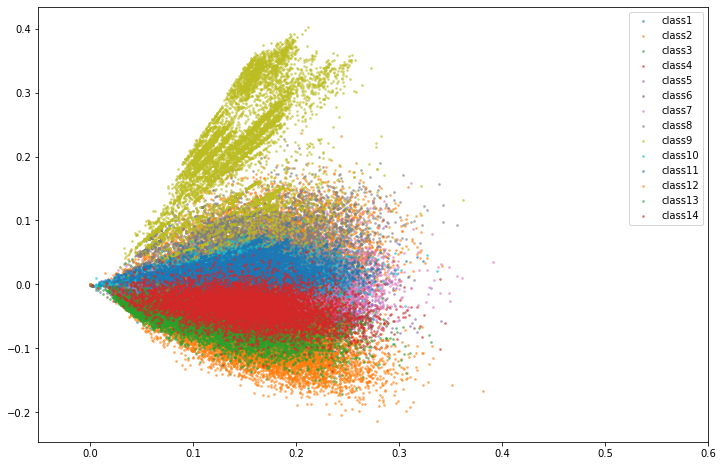

In [97]:
plt.figure(figsize=(12,8))
for i in range(1,15):
    plt.scatter(dfdict[i]['p1'].tolist(),dfdict[i]['p2'].tolist(),alpha=0.5,s=3,label="class"+str(i))
plt.xlim(-0.05,0.6)
plt.legend()
plt.show()

### Baseline model 

The baseline model will be multinomial naive bayes.

In [16]:
# Baseline model
from sklearn.naive_bayes import MultinomialNB

model1 = MultinomialNB()
model1.fit(X,Y)
pred1 = model1.predict(Xtest)
print(accuracy_score(pred1,Ytest))

0.9515714285714286


Using decision tree

In [18]:
from sklearn.tree import DecisionTreeClassifier

for i in [100,125,150,200,250]:
    model2 = DecisionTreeClassifier(max_depth=i)
    model2.fit(X,Y)
    pred2 = model2.predict(Xtest)
    print(accuracy_score(pred2,Ytest))

0.8980857142857143
0.8968571428571429
0.8987571428571428
0.8980142857142858
0.8977428571428572


Decision tree tried with 
- max_depth = 20 : accuracy - 0.7943
- max_depth = 50 : accuracy - 0.8868
- max_depth = 100: accuracy - 0.89808
- max_depth = 125: accuracy - 0.89685
- max_depth = 150: accuracy - 0.898757
- max_depth = 200: accuracy - 0.898104
- max_depth = 250: accuracy - 0.8977

Using K-Nearest neighbour

In [39]:
from sklearn.neighbors import KNeighborsClassifier

model3 = KNeighborsClassifier(71)
model3.fit(X,Y)
pred3 = model3.predict(Xtest)
print(accuracy_score(pred3,Ytest))

0.9198571428571428


- with k = 3 : accuracy = 0.8412
- with k = 5 : accuracy = 0.84
- with k = 11: accuracy = 0.88
- with k = 21: accuracy = 0.90627
- with k = 31: accuracy = 0.91161428
- with k = 41: accuracy = 0.915514
- with k = 71: accuracy = 0.91985

Using Logistic Regression

In [21]:
from sklearn.linear_model import LogisticRegression

model6 = LogisticRegression()
model6.fit(X,Y)
pred6 = model6.predict(Xtest)
print(accuracy_score(pred6,Ytest))

0.9750857142857143


/home/msc2/.local/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Using an ensemble of Logistic regression, Linear supprt vector classifier and Multinomial Naive Bayes as these gave a better performance

In [22]:
from sklearn.ensemble import VotingClassifier 

estimator = [] 
estimator.append(('LR',  LogisticRegression())) 
estimator.append(('SVC', LinearSVC())) 
estimator.append(('NB', MultinomialNB()))
model7 = VotingClassifier(estimators = estimator) 
model7.fit(X,Y) 
pred7 = model7.predict(Xtest)
print(accuracy_score(pred7,Ytest))

/home/msc2/.local/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.9783


Using Linear Support Vector Classifier

In [45]:
from sklearn.svm import LinearSVC

model5 = LinearSVC()
model5.fit(X,Y)
pred5 = model5.predict(Xtest)
print(accuracy_score(pred5,Ytest))

0.9798428571428571


In [39]:
Y_feats = {1:[1,0,0,0,0,0,0,0,0,0,0,0,0,0],
          2:[0,1,0,0,0,0,0,0,0,0,0,0,0,0],
          3:[0,0,1,0,0,0,0,0,0,0,0,0,0,0],
          4:[0,0,0,1,0,0,0,0,0,0,0,0,0,0],
          5:[0,0,0,0,1,0,0,0,0,0,0,0,0,0],
          6:[0,0,0,0,0,1,0,0,0,0,0,0,0,0],
          7:[0,0,0,0,0,0,1,0,0,0,0,0,0,0],
          8:[0,0,0,0,0,0,0,1,0,0,0,0,0,0],
          9:[0,0,0,0,0,0,0,0,1,0,0,0,0,0],
         10:[0,0,0,0,0,0,0,0,0,1,0,0,0,0],
         11:[0,0,0,0,0,0,0,0,0,0,1,0,0,0],
         12:[0,0,0,0,0,0,0,0,0,0,0,1,0,0],
         13:[0,0,0,0,0,0,0,0,0,0,0,0,1,0],
         14:[0,0,0,0,0,0,0,0,0,0,0,0,0,1],}

Y_oh = np.array([Y_feats[x] for x in Ytest])

### Results

##### Decision Tree

- max_depth = 20 : accuracy - 0.7943
- max_depth = 50 : accuracy - 0.8868
- max_depth = 100: accuracy - 0.89808
- max_depth = 125: accuracy - 0.89685
- max_depth = 150: accuracy - 0.898757
- max_depth = 200: accuracy - 0.898104
- max_depth = 250: accuracy - 0.8977

##### K-Nearest Neighbour

- with k = 3 : accuracy = 0.8412
- with k = 5 : accuracy = 0.84
- with k = 11: accuracy = 0.88
- with k = 21: accuracy = 0.90627
- with k = 41: accuracy = 0.915514
- with k = 71: accuracy = 0.91985

##### Multinomial NB

- accuracy : 0.9515

##### LogisticRegression

- accuracy : 0.9751

##### Support Vector Classifier

- accuracy : 0.9798

##### Voting (NB, Linear SVC, Logistic Regression)

- accuracy : 0.9783

In [40]:
from sklearn.svm import LinearSVC
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_auc_score,roc_curve,auc


n_classes=14
clf = OneVsRestClassifier(LinearSVC(random_state=0))
y_score = clf.fit(X,Y).decision_function(Xtest)
print(np.array(Y_oh))
print(y_score[:,0])
fpr = {}
tpr = {}
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(Y_oh[:,i], y_score[:,i])
    roc_auc[i] = auc(fpr[i], tpr[i])


[[1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 1]]
[ 2.27601756  0.30591759  1.1802424  ... -2.66069531 -2.76539958
 -2.73895214]


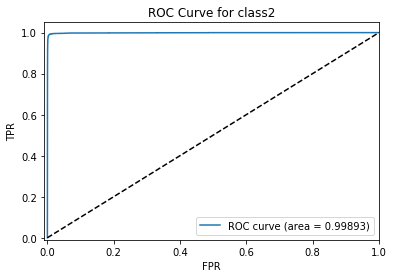

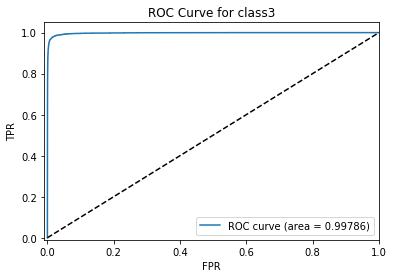

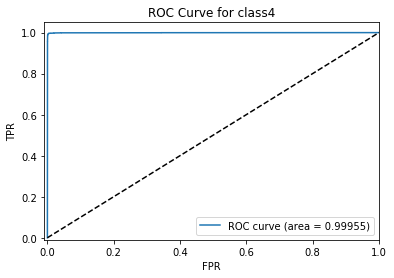

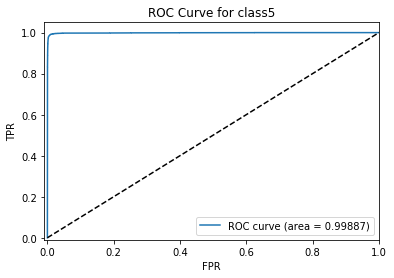

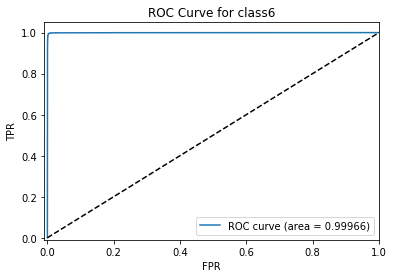

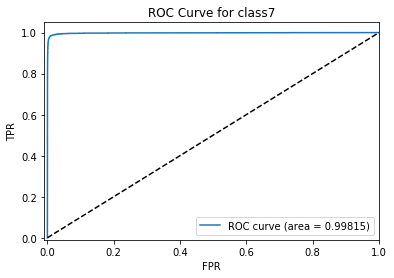

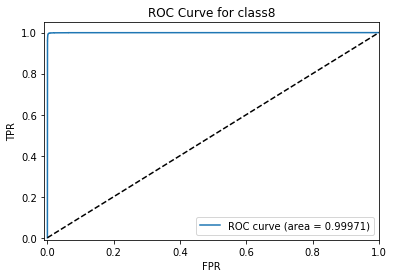

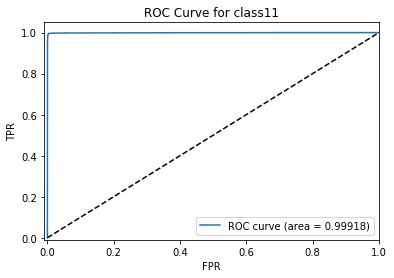

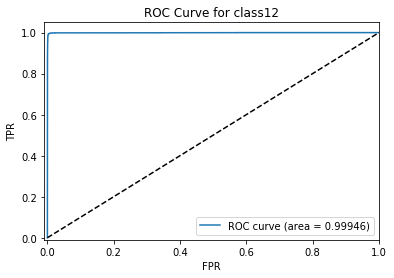

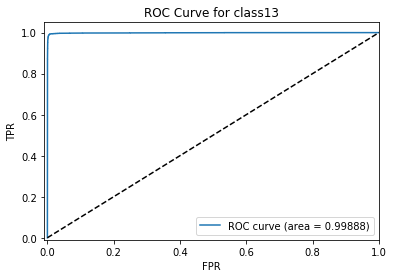

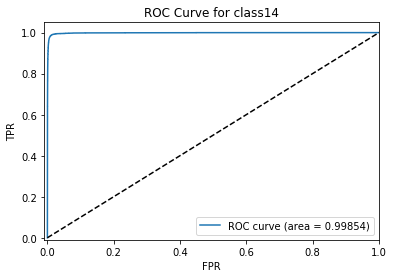

In [46]:
# Plot of a ROC curve for a specific class
for i in range(n_classes):
    plt.figure()
    plt.plot(fpr[i], tpr[i], label='ROC curve (area = %0.5f)' % roc_auc[i])
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([-0.01, 1.0])
    plt.ylim([-0.01, 1.05])
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.title('ROC Curve for class'+str(i+1))
    plt.legend(loc="lower right")
    plt.show()

### Using Deep Learning LSTM

#### Pre-processing step

- First tokenize the words in the body
- Remove stop words and punctuations
- Lemmatize each word using its POS tag
- Create a vocabulary

In [6]:
from nltk.tokenize import TreebankWordTokenizer

In [7]:
tokenizer = TreebankWordTokenizer()
tkn_body=[]

In [8]:
for i in body:
    tkn_body.append(tokenizer.tokenize(i))

[['Daisy',
  'Systems',
  'Corporation',
  'incorporated',
  'in',
  '1981',
  'in',
  'Mountain',
  'View',
  'California',
  'was',
  'a',
  'computer-aided',
  'engineering',
  'company',
  'a',
  'pioneer',
  'in',
  'the',
  'electronic',
  'design',
  'automation',
  '(',
  'EDA',
  ')',
  'industry',
  '.'],
 ['Rutki-Kossaki',
  '[',
  'ˈrutki',
  'kɔsˈsaki',
  ']',
  'is',
  'a',
  'village',
  'in',
  'Zambrów',
  'County',
  'koszary',
  'Podlaskie',
  'Voivodeship',
  'in',
  'north-eastern',
  'Poland.',
  'It',
  'is',
  'the',
  'seat',
  'of',
  'the',
  'gmina',
  '(',
  'administrative',
  'district',
  ')',
  'called',
  'Gmina',
  'Rutki.',
  'It',
  'lies',
  'approximately',
  '17',
  'kilometres',
  '(',
  '11',
  'mi',
  ')',
  'north-east',
  'of',
  'Zambrów',
  'and',
  '50',
  'km',
  '(',
  '31',
  'mi',
  ')',
  'west',
  'of',
  'the',
  'regional',
  'capital',
  'Białystok.The',
  'village',
  'has',
  'a',
  'population',
  'of',
  '1300',
  '.'],
 ['US

In [9]:
from nltk.corpus import stopwords
stp = list(set(stopwords.words('english')))

puncs = '~`!@#$%^&*()_-=+{}[];:\'".,<>/?\\/'
punclist=list(puncs)

In [89]:
import re
mod_ttl=[]
mod_bdy=[]
for i in range(len(tkn_body)):
    mod_ttl.append([x.lower() for x in tkn_title[i] if (x not in punclist and re.match("[a-zA-Z0-9]",x)!=None)])
    mod_bdy.append([x.lower() for x in tkn_body[i] if (x not in punclist and re.match("[a-zA-Z0-9]",x)!=None)])

In [90]:
from nltk.stem import WordNetLemmatizer
from nltk.tag import pos_tag

ptags = []
for i in mod_bdy:
    ptags.append(pos_tag(i))

[[('daisy', 'NN'),
  ('systems', 'NNS'),
  ('corporation', 'NN'),
  ('incorporated', 'VBN'),
  ('in', 'IN'),
  ('1981', 'CD'),
  ('in', 'IN'),
  ('mountain', 'NN'),
  ('view', 'NN'),
  ('california', 'NN'),
  ('was', 'VBD'),
  ('a', 'DT'),
  ('computer-aided', 'JJ'),
  ('engineering', 'NN'),
  ('company', 'NN'),
  ('a', 'DT'),
  ('pioneer', 'NN'),
  ('in', 'IN'),
  ('the', 'DT'),
  ('electronic', 'JJ'),
  ('design', 'NN'),
  ('automation', 'NN'),
  ('eda', 'NN'),
  ('industry', 'NN')],
 [('rutki-kossaki', 'JJ'),
  ('kɔsˈsaki', 'NN'),
  ('is', 'VBZ'),
  ('a', 'DT'),
  ('village', 'NN'),
  ('in', 'IN'),
  ('zambrów', 'NNP'),
  ('county', 'NN'),
  ('koszary', 'JJ'),
  ('podlaskie', 'NN'),
  ('voivodeship', 'NN'),
  ('in', 'IN'),
  ('north-eastern', 'JJ'),
  ('poland.', 'NN'),
  ('it', 'PRP'),
  ('is', 'VBZ'),
  ('the', 'DT'),
  ('seat', 'NN'),
  ('of', 'IN'),
  ('the', 'DT'),
  ('gmina', 'JJ'),
  ('administrative', 'JJ'),
  ('district', 'NN'),
  ('called', 'VBN'),
  ('gmina', 'NN'),
  ('r

In [91]:
lemmatizer = WordNetLemmatizer()
lem_tkns=[]
tg=['n','v','r','a']
for i in ptags:
    tm=[]
    for j in i:
        if j[1][0].lower() in tg:
            tm.append(lemmatizer.lemmatize(j[0],j[1][0].lower()))
        else:
            tm.append(lemmatizer.lemmatize(j[0],'n'))
    lem_tkns.append(tm)

[['daisy',
  'system',
  'corporation',
  'incorporate',
  'in',
  '1981',
  'in',
  'mountain',
  'view',
  'california',
  'be',
  'a',
  'computer-aided',
  'engineering',
  'company',
  'a',
  'pioneer',
  'in',
  'the',
  'electronic',
  'design',
  'automation',
  'eda',
  'industry'],
 ['rutki-kossaki',
  'kɔsˈsaki',
  'be',
  'a',
  'village',
  'in',
  'zambrów',
  'county',
  'koszary',
  'podlaskie',
  'voivodeship',
  'in',
  'north-eastern',
  'poland.',
  'it',
  'be',
  'the',
  'seat',
  'of',
  'the',
  'gmina',
  'administrative',
  'district',
  'call',
  'gmina',
  'rutki.',
  'it',
  'lie',
  'approximately',
  '17',
  'kilometre',
  '11',
  'mi',
  'north-east',
  'of',
  'zambrów',
  'and',
  '50',
  'km',
  '31',
  'mi',
  'west',
  'of',
  'the',
  'regional',
  'capital',
  'białystok.the',
  'village',
  'have',
  'a',
  'population',
  'of',
  '1300'],
 ['us',
  'mecosta',
  'ytb-818',
  'be',
  'a',
  'united',
  'state',
  'navy',
  'natick-class',
  'larg

In [92]:
lens = [len(x) for x in lem_tkns]
max_len = max(lens)

348


In [93]:
vocab=[]
for i in lem_tkns:
    vocab+=i
vocab=list(set(vocab))

['alinco',
 'libertini',
 '535',
 "l'alfa",
 'cassava',
 'emcare',
 'stalin.in',
 'internally',
 'trelles',
 'lehesten.',
 'conraui',
 'rosewood',
 'yodsanan',
 'md-12',
 'dīzaj-e',
 'rainbow.',
 '1540',
 'kaadhal',
 'vice-roy',
 'iliensis',
 'alberni',
 'ramian',
 'jerome',
 'garni.the',
 'honey',
 'garbów',
 'gonicoelus',
 'kalingag',
 'prophet.',
 'anya',
 'acalis',
 'sebastapistes',
 'partito',
 'onychophoran',
 'alexios',
 'continents.100whf',
 'landspeed',
 'flamuri',
 'sportbikes.',
 'grda',
 'negligible',
 'eger',
 'saladin',
 'donaire',
 'rabindranath',
 'may',
 'songmingensis',
 'hurdles.',
 'chūnqǐ',
 'herself.',
 'poltava.in',
 'talkhāb',
 'offbeat',
 'calgarian.',
 'tóth',
 'mariehamn',
 'jankovich',
 '50s.',
 'weider.',
 'hodgson',
 'jalisco',
 'chasseurs',
 'jblfmu-molo',
 'campestris.',
 '6–10',
 'tagil',
 'tiedeman',
 'lid.the',
 'dixit-nene',
 'disillusioned',
 'extended-range',
 'danton',
 'rasheed',
 'sauvey',
 'años',
 'michelle',
 'gajabahu',
 'jivraj',
 'susumu',

In [94]:
vocab_size = len(vocab)

176274

Assigning each term in vocabulary, a unique id manually (using enumeration). Keeping the last as ENDPAD

In [95]:
word2idx = {i:x for x,i in enumerate(vocab)}

{'alinco': 0,
 'libertini': 1,
 '535': 2,
 "l'alfa": 3,
 'cassava': 4,
 'emcare': 5,
 'stalin.in': 6,
 'internally': 7,
 'trelles': 8,
 'lehesten.': 9,
 'conraui': 10,
 'rosewood': 11,
 'yodsanan': 12,
 'md-12': 13,
 'dīzaj-e': 14,
 'rainbow.': 15,
 '1540': 16,
 'kaadhal': 17,
 'vice-roy': 18,
 'iliensis': 19,
 'alberni': 20,
 'ramian': 21,
 'jerome': 22,
 'garni.the': 23,
 'honey': 24,
 'garbów': 25,
 'gonicoelus': 26,
 'kalingag': 27,
 'prophet.': 28,
 'anya': 29,
 'acalis': 30,
 'sebastapistes': 31,
 'partito': 32,
 'onychophoran': 33,
 'alexios': 34,
 'continents.100whf': 35,
 'landspeed': 36,
 'flamuri': 37,
 'sportbikes.': 38,
 'grda': 39,
 'negligible': 40,
 'eger': 41,
 'saladin': 42,
 'donaire': 43,
 'rabindranath': 44,
 'may': 45,
 'songmingensis': 46,
 'hurdles.': 47,
 'chūnqǐ': 48,
 'herself.': 49,
 'poltava.in': 50,
 'talkhāb': 51,
 'offbeat': 52,
 'calgarian.': 53,
 'tóth': 54,
 'mariehamn': 55,
 'jankovich': 56,
 '50s.': 57,
 'weider.': 58,
 'hodgson': 59,
 'jalisco': 60

In [96]:
word2idx['[_ENDPAD_]']=vocab_size+1

Converting terms in the sentences to their numeric equivalent

In [97]:
seq=[]
for i in lem_tkns:
    seq.append([word2idx[x] for x in i])
seq

[[13704,
  119895,
  65190,
  172283,
  99888,
  37872,
  99888,
  78211,
  73743,
  160769,
  37519,
  98424,
  121662,
  97993,
  167325,
  98424,
  143123,
  99888,
  113308,
  101731,
  131342,
  23026,
  4595,
  128684],
 [150558,
  16793,
  37519,
  98424,
  73128,
  99888,
  57943,
  125309,
  46249,
  90249,
  145845,
  99888,
  138984,
  56663,
  131437,
  37519,
  113308,
  63175,
  52624,
  113308,
  151699,
  88376,
  6191,
  51744,
  151699,
  36173,
  131437,
  15985,
  23326,
  70791,
  69931,
  53455,
  148806,
  15811,
  52624,
  57943,
  116423,
  63161,
  162152,
  172746,
  148806,
  6533,
  52624,
  113308,
  144107,
  64569,
  110501,
  73128,
  117802,
  98424,
  14019,
  52624,
  37882],
 [127374,
  42313,
  104850,
  37519,
  98424,
  65207,
  133533,
  71049,
  126195,
  151516,
  6191,
  55855,
  94132,
  39685,
  79948,
  42313,
  72017],
 [118113,
  21665,
  147241,
  37519,
  131278,
  75069,
  37055,
  176098,
  121854,
  87188,
  99888,
  150583,
  13708

Padding the dataset with ENDPAD for the model to get trained

In [98]:
from keras.preprocessing.sequence import pad_sequences

X = pad_sequences(seq,padding='post',value=word2idx['[_ENDPAD_]'])
X

array([[ 13704, 119895,  65190, ..., 176275, 176275, 176275],
       [150558,  16793,  37519, ..., 176275, 176275, 176275],
       [127374,  42313, 104850, ..., 176275, 176275, 176275],
       ...,
       [ 70009,  32186,  71101, ..., 176275, 176275, 176275],
       [ 81815,  48866, 167158, ..., 176275, 176275, 176275],
       [119541,  79948,  98424, ..., 176275, 176275, 176275]], dtype=int32)

One hot encoding the label classes (for applying softmax)

In [101]:
Y_feats = {1:[1,0,0,0,0,0,0,0,0,0,0,0,0,0],
          2:[0,1,0,0,0,0,0,0,0,0,0,0,0,0],
          3:[0,0,1,0,0,0,0,0,0,0,0,0,0,0],
          4:[0,0,0,1,0,0,0,0,0,0,0,0,0,0],
          5:[0,0,0,0,1,0,0,0,0,0,0,0,0,0],
          6:[0,0,0,0,0,1,0,0,0,0,0,0,0,0],
          7:[0,0,0,0,0,0,1,0,0,0,0,0,0,0],
          8:[0,0,0,0,0,0,0,1,0,0,0,0,0,0],
          9:[0,0,0,0,0,0,0,0,1,0,0,0,0,0],
         10:[0,0,0,0,0,0,0,0,0,1,0,0,0,0],
         11:[0,0,0,0,0,0,0,0,0,0,1,0,0,0],
         12:[0,0,0,0,0,0,0,0,0,0,0,1,0,0],
         13:[0,0,0,0,0,0,0,0,0,0,0,0,1,0],
         14:[0,0,0,0,0,0,0,0,0,0,0,0,0,1],}

In [103]:
Y = [Y_feats[x] for x in dfs[0].tolist()]
Y = np.array(Y)
Y

array([[1, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 1]])

In [104]:
print(X.shape)

(56000, 348)


#### Using Keras to implement the Embedding+LSTM

In [105]:
from keras.layers import Dense,Dropout,Input
from keras.layers import Embedding,LSTM
from keras.models import Model

In [38]:
from keras.callbacks import ModelCheckpoint

best_model = "dbpedia_best_model.h5"
checkpointer = ModelCheckpoint(filepath = best_model,monitor = 'val_acc',verbose=0,save_best_only = True,mode = 'max')

In [117]:
inp = Input(shape=(max_len,))
model = Embedding(input_dim=(vocab_size+2), output_dim=32, input_length=max_len)(inp)
model = LSTM(32)(model)
model = Dense(16,activation='relu')(model)
out = Dense(14, activation="softmax")(model)

In [118]:
model = Model(inp, out)

In [119]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_9 (InputLayer)         (None, 348)               0         
_________________________________________________________________
embedding_9 (Embedding)      (None, 348, 32)           5640832   
_________________________________________________________________
lstm_9 (LSTM)                (None, 32)                8320      
_________________________________________________________________
dense_10 (Dense)             (None, 16)                528       
_________________________________________________________________
dense_11 (Dense)             (None, 14)                238       
Total params: 5,649,918
Trainable params: 5,649,918
Non-trainable params: 0
_________________________________________________________________


In [120]:
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

In [124]:
model.fit(X,Y, batch_size=512, epochs=5, validation_split=0.2,callbacks = [checkpointer])

Train on 44800 samples, validate on 11200 samples
Epoch 1/5
13824/44800 [========>.....................] - ETA: 23s - loss: 2.6390 - acc: 0.0710

KeyboardInterrupt: 

Because of resource constraints, first it gave Resource error.

Running it once more gave very less accuracy. It has to run more epochs on GPU for giving good results.